In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# seaborn
import seaborn as sns
# scipy stats para simular
import scipy.stats as stats
# statsmodels para modelación
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
import lec6_graphs as gfx
plt.style.use('seaborn') # Gráficos estilo seaborn
# plt.rcParams["figure.figsize"] = (6, 3) # Tamaño gráficos
# plt.rcParams["figure.dpi"] = 200 # resolución gráficos

In [2]:
# ingresamos la base de datos
df = pd.read_csv('wells.csv')
# La base de datos incluye una columna de índice. Eliminemosla para evitar futuros conflictos
df = df.drop("index", axis =1)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,'dist100':'assoc'], df['y'], test_size=.33,random_state=11238)

In [5]:
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [6]:
default_model = LogisticRegression().fit(X_train,y_train)

In [7]:
default_model.coef_

array([[-0.86034748,  0.53272682,  0.14018453, -0.10530747]])

In [8]:
default_model.intercept_

array([-0.25195454])

In [12]:
yhat = default_model.predict(X_test_std)
yhat[:20]

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1],
      dtype=int64)

In [13]:
yhat_pr = default_model.predict_proba(X_test_std)
yhat_pr[:20]

array([[0.92194709, 0.07805291],
       [0.32209921, 0.67790079],
       [0.17463252, 0.82536748],
       [0.97605212, 0.02394788],
       [0.54330482, 0.45669518],
       [0.65641785, 0.34358215],
       [0.36797021, 0.63202979],
       [0.63869951, 0.36130049],
       [0.44493314, 0.55506686],
       [0.57127946, 0.42872054],
       [0.48618401, 0.51381599],
       [0.69574405, 0.30425595],
       [0.39372022, 0.60627978],
       [0.87453505, 0.12546495],
       [0.75674281, 0.24325719],
       [0.69317112, 0.30682888],
       [0.804052  , 0.195948  ],
       [0.46227443, 0.53772557],
       [0.49984594, 0.50015406],
       [0.43651774, 0.56348226]])

In [14]:
from sklearn.metrics import confusion_matrix

m1_confusion = confusion_matrix(y_test,yhat)

In [15]:
m1_confusion

array([[288, 134],
       [310, 265]], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
m1_acc = accuracy_score(y_test,yhat)
m1_acc

0.5546639919759278

In [19]:
from sklearn.metrics import precision_score
m1_prec = precision_score(y_test,yhat)
m1_prec # 16% mejor que le azar de identificar de identificar las etiquetas correctamente dentro de las positivas

0.6641604010025063

In [22]:
from sklearn.metrics import recall_score
m1_recall = recall_score(y_test,yhat)
m1_recall # mide la fraccion de verdaderos reales predichos 

0.4608695652173913

In [24]:
from sklearn.metrics import f1_score
m1_fscore = f1_score(y_test,yhat)
m1_fscore # alcanza 1 cuando ambos son 1, y 0 cuando una de las 2 se obtiene 0 inmediato, pondera entre las 2 anteriores

0.5441478439425053

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.48      0.68      0.56       422
           1       0.66      0.46      0.54       575

    accuracy                           0.55       997
   macro avg       0.57      0.57      0.55       997
weighted avg       0.59      0.55      0.55       997



In [42]:
yhat_pr = default_model.predict_proba(X_test)[:,1]

In [38]:
def roc_graphic(y_test, y_hat):
    from sklearn.metrics import roc_curve
    false_positive , true_positive , threshold = roc_curve(y_test,y_hat[:,1])
    plt.plot(false_positive,true_positive,lw = 1)
    plt.plot([0,1], linestyle='--', lw=1, color='tomato')
    plt.ylabel('Verdaderos Positivos')
    plt.xlabel('Falsos Positivos')

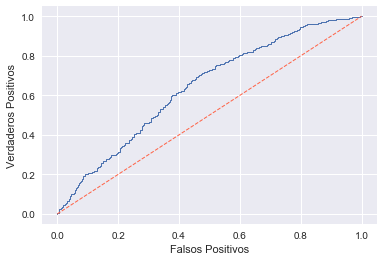

In [39]:
roc_graphic(y_test,yhat_pr)

In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, yhat_pr)

0.642237791057078

In [47]:
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(),
                X=df.loc[:,'dist100':'assoc'],
                y=df['y'],
                cv=3,
                scoring='f1'
               )

array([0.70499244, 0.68932806, 0.69954476])

In [51]:
from sklearn.model_selection import LeaveOneOut

m1_cv_loo = cross_val_score(LogisticRegression(),
                X=df.loc[:,'dist100':'assoc'],
                y=df['y'],
                cv=LeaveOneOut(),
                scoring='accuracy' # en la practica es mejor, dado que si cae alguno de las metricas precision o recall todo es 0 o 1
               )

In [52]:
m1_cv_loo

array([1., 0., 0., ..., 0., 0., 1.])

In [53]:
np.mean(m1_cv_loo)

0.6139072847682119

In [54]:
##Experimento

In [55]:
std_matrix = StandardScaler().fit_transform(df.loc[:,'dist100':'assoc'])

In [56]:
from sklearn.preprocessing import PolynomialFeatures

df_int_2 = PolynomialFeatures(degree=2,
                              interaction_only=True,
                              include_bias=False            
).fit_transform(std_matrix)


df_int_3 = PolynomialFeatures(degree=3,
                              interaction_only=True,
                              include_bias=False            
).fit_transform(std_matrix)

In [59]:
df.shape

(3020, 5)

In [57]:
df_int_2.shape

(3020, 10)

In [58]:
df_int_3.shape

(3020, 14)

In [60]:
eval_metrics = ['f1','precision','recall','accuracy']

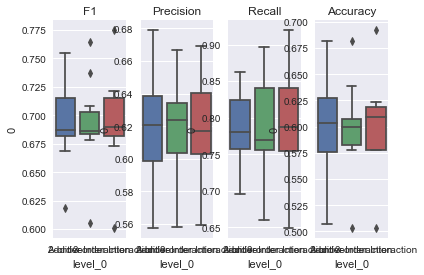

In [68]:
for index, value in enumerate(eval_metrics):
    tmp_1 = cross_val_score(LogisticRegression(),
                           df.loc[:,'dist100':'assoc'],
                           df['y'],cv=10,scoring=value)
    tmp_2 = cross_val_score(LogisticRegression(),
                           df_int_2,
                           df['y'],cv=10,scoring=value)
    tmp_3 = cross_val_score(LogisticRegression(),
                           df_int_3,
                           df['y'],cv=10,scoring=value)
    tmp = pd.DataFrame(
    {'Additive': tmp_1, '2-order Interaction': tmp_2, '3-order Interaction': tmp_3}
    ).unstack().reset_index()
    
    tmp.rename(columns={'Level_0':'order', 'level_1':'num','0':'score'}, inplace=True)
    plt.subplot(1,4, index +1)
    sns.boxplot(tmp.iloc[:,0], tmp.iloc[:,2])
    plt.title(value.capitalize())